# **Introducao a Analise Preditiva**

**prof: Sergio Assuncao Monteiro, DSc**

linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

lattes: http://lattes.cnpq.br/9489191035734025


**Análise de Dados Financeiros**

# **Instalação dos Pacotes**

In [30]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importação dos Pacotes**

In [33]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# **Baixar Dados Reais**

In [34]:
dados_series = yf.download("PETR4.SA", start="2018-01-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [35]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                                Open       High        Low      Close  \
Date                                                                    
2018-01-02 00:00:00-02:00  16.190001  16.549999  16.190001  16.549999   
2018-01-03 00:00:00-02:00  16.490000  16.719999  16.370001  16.700001   
2018-01-04 00:00:00-02:00  16.780001  16.959999  16.620001  16.730000   
2018-01-05 00:00:00-02:00  16.700001  16.860001  16.570000  16.830000   
2018-01-08 00:00:00-02:00  16.740000  17.030001  16.709999  17.030001   
...                              ...        ...        ...        ...   
2021-12-23 00:00:00-03:00  28.330000  28.420000  28.150000  28.330000   
2021-12-27 00:00:00-03:00  28.320000  28.780001  28.150000  28.750000   
2021-12-28 00:00:00-03:00  29.010000  29.280001  28.700001  28.780001   
2021-12-29 00:00:00-03:00  28.700001  28.900000  28.420000  28.540001   
2021-12-30 00:00:00-03:00  28.549999  28.700001  28.389999  28.450001   

                           Adj Close    Volume  
D

In [36]:
#Selecionar apenas os dados referentes ao preço de fechamento
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1) 

In [37]:
y=[]
for a in df['Close']:
  y.append(a)

In [38]:
x = np.arange (1,len(y)+1,1)

**padronização dos dados**

In [39]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

**Visualização da Série**

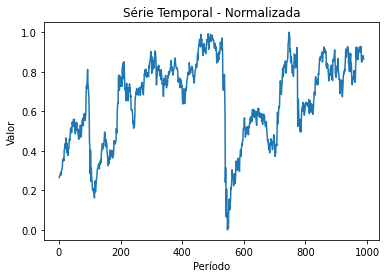

In [40]:
import matplotlib.pyplot as plt
plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

**Preparação dos conjuntos de dados de treinamento e de teste**

In [41]:
percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

treino[1]: [1.         0.26525462]
treino[2]: [2.         0.27281899]
treino[3]: [3.         0.27433179]
treino[4]: [4.         0.27937467]
treino[5]: [5.         0.28946044]


**Organização do modelo de dados**

In [42]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [43]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [44]:
look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

treino[1]: [[0.26525462]
 [0.27281899]] -> 0.27433178717549045
treino[2]: [[0.27281899]
 [0.27433179]] -> 0.2793746705363175
treino[3]: [[0.27433179]
 [0.27937467]] -> 0.2894604372579715
treino[4]: [[0.27937467]
 [0.28946044]] -> 0.2894604372579715
treino[5]: [[0.28946044]
 [0.28946044]] -> 0.2778617766725694


**Criação do Modelo de Redes Neurais**

In [45]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


**Visualização do modelo**

In [46]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 100)            40800     
                                                                 
 dropout_1 (Dropout)         (None, 2, 100)            0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [47]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [48]:
historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = 2,
                       shuffle = False,
                       validation_split = 0.3)

Epoch 1/20
8/8 - 9s - loss: 0.3715 - val_loss: 0.1973 - 9s/epoch - 1s/step
Epoch 2/20
8/8 - 0s - loss: 0.1663 - val_loss: 0.0431 - 289ms/epoch - 36ms/step
Epoch 3/20
8/8 - 0s - loss: 0.0129 - val_loss: 0.0356 - 305ms/epoch - 38ms/step
Epoch 4/20
8/8 - 0s - loss: 0.0366 - val_loss: 0.0210 - 345ms/epoch - 43ms/step
Epoch 5/20
8/8 - 0s - loss: 0.0182 - val_loss: 0.0087 - 318ms/epoch - 40ms/step
Epoch 6/20
8/8 - 0s - loss: 0.0150 - val_loss: 0.0075 - 361ms/epoch - 45ms/step
Epoch 7/20
8/8 - 0s - loss: 0.0081 - val_loss: 0.0110 - 339ms/epoch - 42ms/step
Epoch 8/20
8/8 - 0s - loss: 0.0099 - val_loss: 0.0091 - 330ms/epoch - 41ms/step
Epoch 9/20
8/8 - 0s - loss: 0.0091 - val_loss: 0.0061 - 322ms/epoch - 40ms/step
Epoch 10/20
8/8 - 0s - loss: 0.0074 - val_loss: 0.0059 - 304ms/epoch - 38ms/step
Epoch 11/20
8/8 - 0s - loss: 0.0065 - val_loss: 0.0058 - 263ms/epoch - 33ms/step
Epoch 12/20
8/8 - 0s - loss: 0.0064 - val_loss: 0.0047 - 222ms/epoch - 28ms/step
Epoch 13/20
8/8 - 0s - loss: 0.0057 - val_

**Visualização do "aprendizado"**

In [49]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.371512,0.197307
1,0.166254,0.043114
2,0.012897,0.035587
3,0.036613,0.021027
4,0.018242,0.008742


**Precisão do Modelo**

In [50]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

4/4 [==============================] - 0s 16ms/step - loss: 0.0012
loss: 0.0012471468653529882


**Visualização do Processo de Aprendizado**

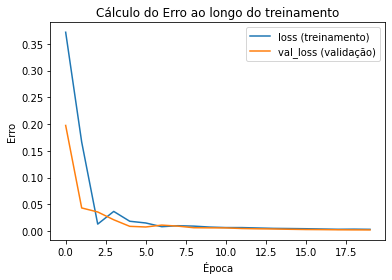

In [51]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [52]:
predicao = modelo.predict(x_teste)

7/7 [==============================] - 3s 7ms/step


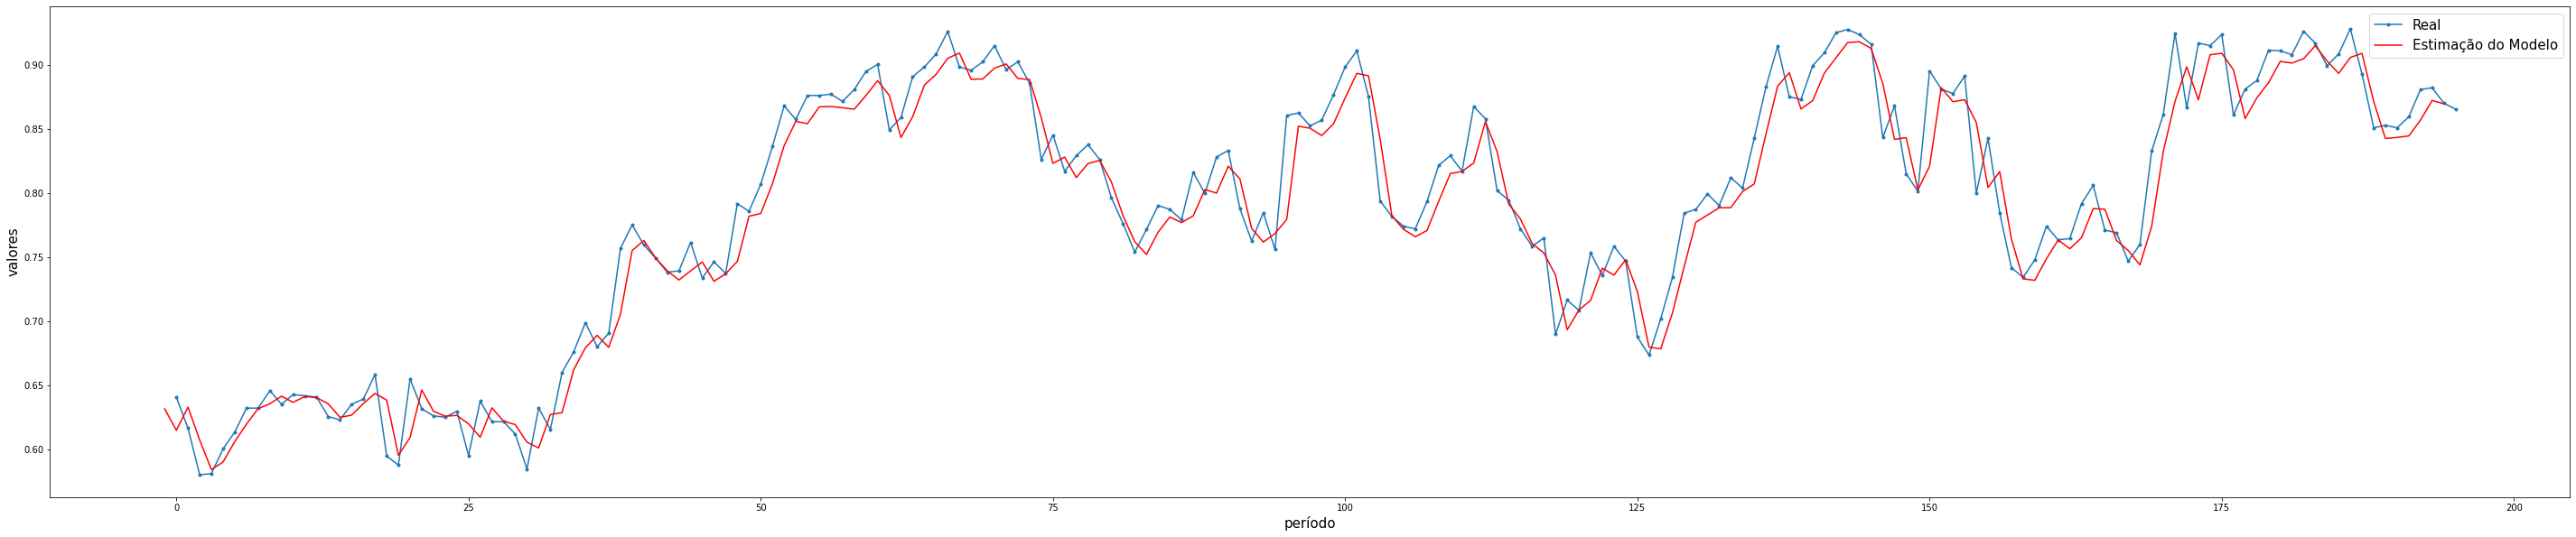

In [53]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Fazendo Predições**

In [54]:
len(valores_reais_y)

196

In [55]:
len(lst_dados_predicao)

196

In [60]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.88199697],
       [0.86989411]])

In [62]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 1s 1s/step


In [64]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[0.26834616]
 [0.26537547]]
